# OUTLINES

## Part1: Statistical Analysis

## Part2: Inferential Statistics

## Part3: A/B Testing




# Part1: Statistical Analysis

## Introduction to Statistics


In [0]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

%matplotlib inline
plt.rcParams['figure.figsize'] = (15,12)

In [0]:
#Data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg','plas','pres','skin','test','mass','pedi','age','class']
data = pandas.read_csv(url, names=names)

In [36]:
# Take a peek at your raw data.
data.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [37]:
# Review the dimensions of your dataset.
data.shape

(768, 9)

In [38]:
# Review the data types of attributes in your data.
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

## Descriptive Statistics

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
# Summarize the distribution of instances across classes in your dataset.
data.describe(include="all")

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
# mean
data["age"].mean()

33.240885416666664

In [42]:
# std
data["age"].std()

11.76023154067868

In [43]:
# variance
data["age"].var()

138.30304589037365

In [44]:
# mode
data["age"].mode()

0    22
dtype: int64

In [45]:
# median
data["age"].median()

29.0

In [46]:
# interquartile range (IQR)
from scipy.stats import iqr
iqr(data["age"])

17.0

In [47]:
# 10th percentile
data["age"].quantile(0.1)

22.0

In [48]:
# 50th percentile same as median
data["age"].quantile(0.5)

29.0

In [49]:
# 90th percentile
data["age"].quantile(0.9)

51.0

In [50]:
# Class Distribution 
data.groupby('class').size()

class
0    500
1    268
dtype: int64

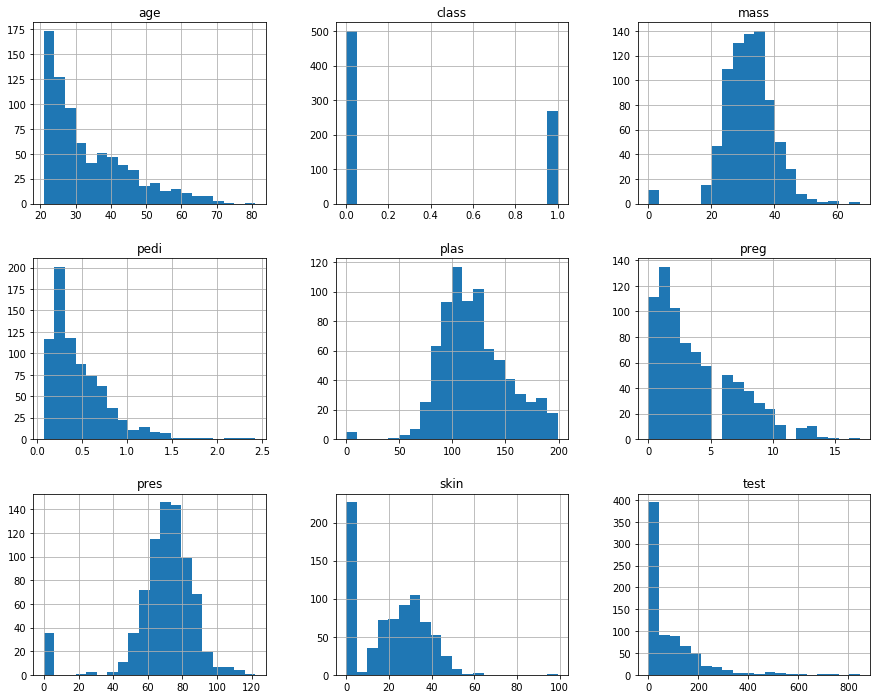

In [51]:
# Histograms
data.hist(bins=20) # adjust bin, range 
plt.show()

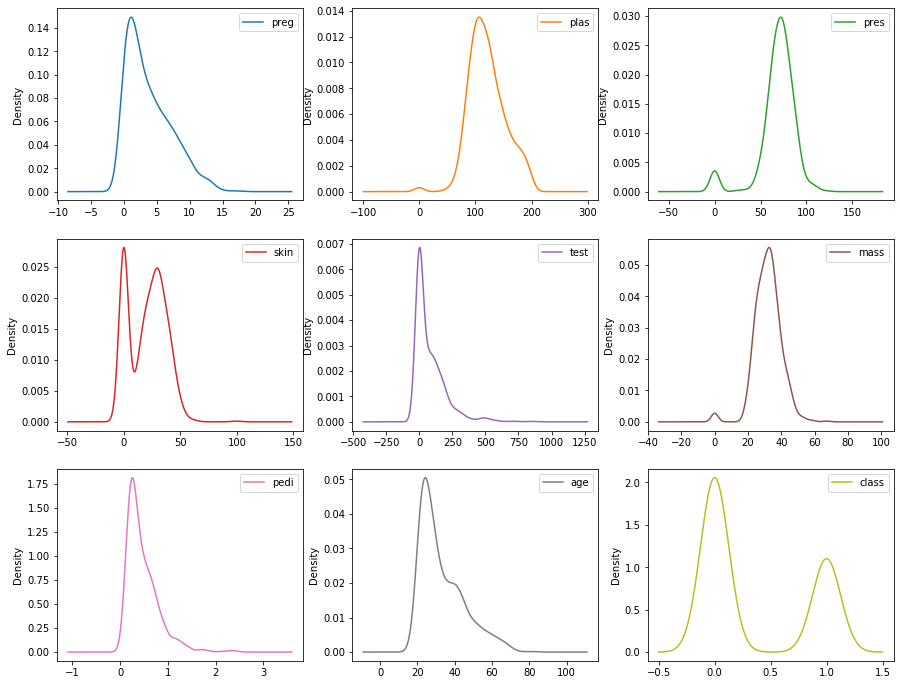

In [52]:
# Density distribution
data.plot(kind= 'density' , subplots=True, layout=(3,3), sharex=False)
plt.show()

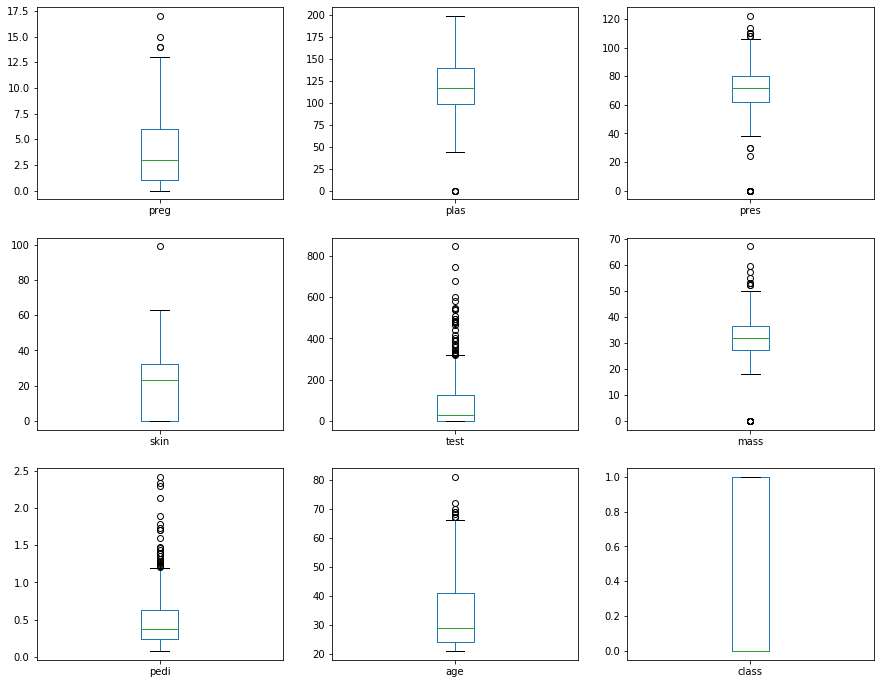

In [53]:
# Box plot
data.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

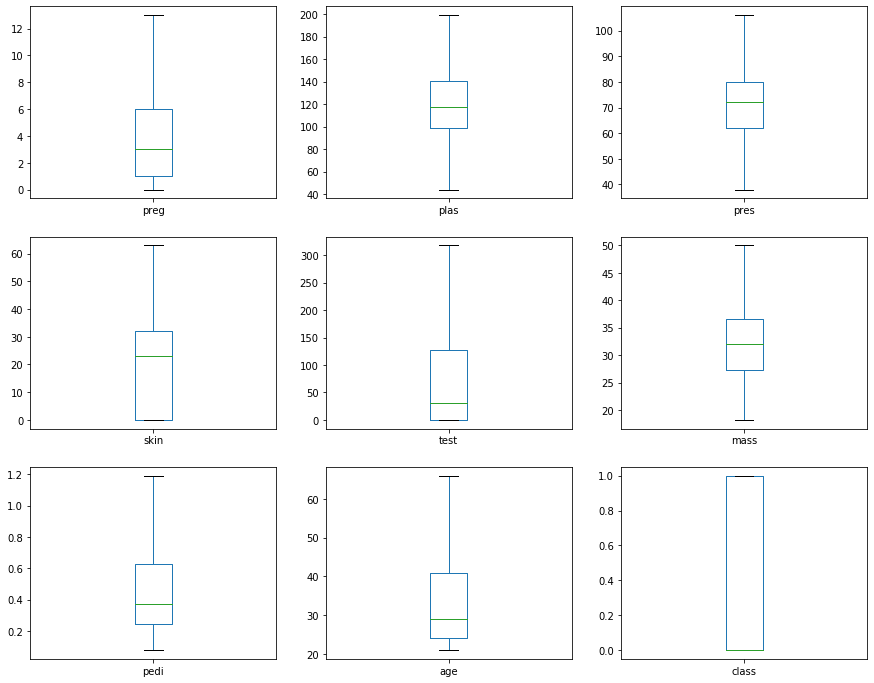

In [54]:
# Box plot with points representing data that extend beyond the whiskers (outliers)
data.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False,showfliers=False)
plt.show()

In [55]:
# X% Truncated (Trimmed) Mean
# x% of observations from each end are removed before the mean is computed
from scipy import stats
# scipy.stats.trim_mean(a, proportiontocut, axis=0)[source]
# If proportiontocut = 0.1, slices off ‘leftmost’ and ‘rightmost’ 10% of scores.
stats.trim_mean(data["age"], 0.1)

31.54383116883117

In [56]:
# X% Winsorized Mean
# x% of observations from each end are replaced with the most extreme remaining values (on both ends) before the mean is computed

# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.winsorize.html

age = data["age"]
age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64

In [57]:
stats.mstats.winsorize(age, limits=0.25, inplace=True)
age.describe()

count    768.000000
mean      31.381510
std        7.001138
min       24.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       41.000000
Name: age, dtype: float64

# Part2: Inferential Statistics


In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [59]:
coffee_full = pd.read_csv('https://github.com/devanshmalik/Inferential-Stats-in-Python/raw/master/confidence%20intervals%20%26%20hypothesis%20testing/coffee_dataset.csv')
print(coffee_full.shape)

(2974, 4)


In [60]:
coffee_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 4 columns):
user_id          2974 non-null int64
age              2974 non-null object
drinks_coffee    2974 non-null bool
height           2974 non-null float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 72.7+ KB


In [61]:
# population
coffee_full["drinks_coffee"].mean()

0.589778076664425

In [62]:
# sample1
coffee_sample = coffee_full.sample(200)
coffee_sample["drinks_coffee"].mean()

0.595

In [63]:
# sample2
coffee_sample = coffee_full.sample(200)
coffee_sample["drinks_coffee"].mean()

0.58

In [64]:
# sample3
coffee_sample = coffee_full.sample(200)
coffee_sample["drinks_coffee"].mean()

0.55

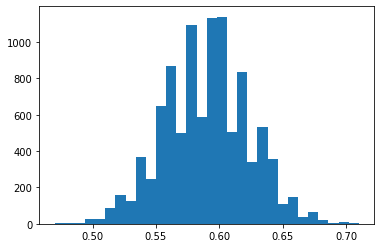

In [65]:
# central limit theorem; is it normal distribution?
# population mean = 0.589778076664425
sample_means = []
for _ in range(10000):
  coffee_sample = coffee_full.sample(200)
  m = coffee_sample["drinks_coffee"].mean()
  sample_means.append(m)
    
plt.hist(sample_means, bins=30)
plt.show()

In [67]:
# confidence interval
# population mean = 0.589778076664425

def mean_confidence_interval(data, confidence=0.95):
  a = 1.0 * np.array(data)
  n = len(a)
  m, se = np.mean(a), scipy.stats.sem(a)
  h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
  return m, h, m-h, m+h

coffee_sample = coffee_full.sample(200)
data = coffee_sample["drinks_coffee"]
m, bound, lower1, upper1 = mean_confidence_interval(data)
print(m, lower1, upper1)

0.64 0.572901619297044 0.707098380702956


In [68]:
# confidence interval with function
import numpy as np, scipy.stats as st
st.t.interval(0.95, len(data)-1, loc=np.mean(data), scale=st.sem(data))

(0.572901619297044, 0.707098380702956)

## Central Limit Theorem (optional)


*   Vary number of samplings
*   Vary sampling size



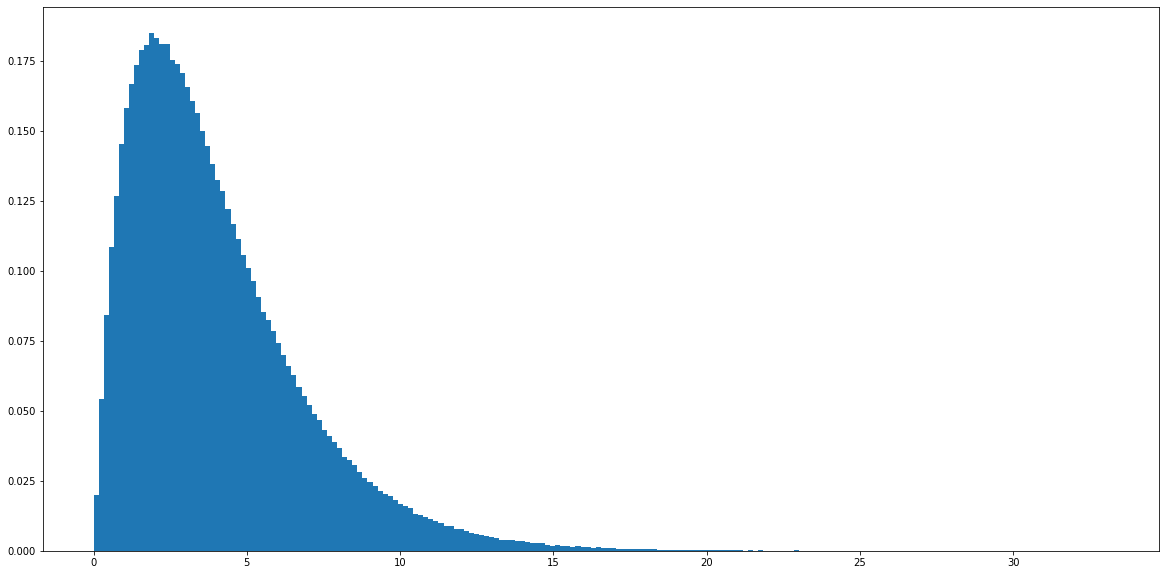

In [69]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## Central limit theorom
# build gamma distribution as population
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000000)
# plot
plt.figure(figsize=(20,10))
plt.hist(s, 200, density=True)
plt.show()

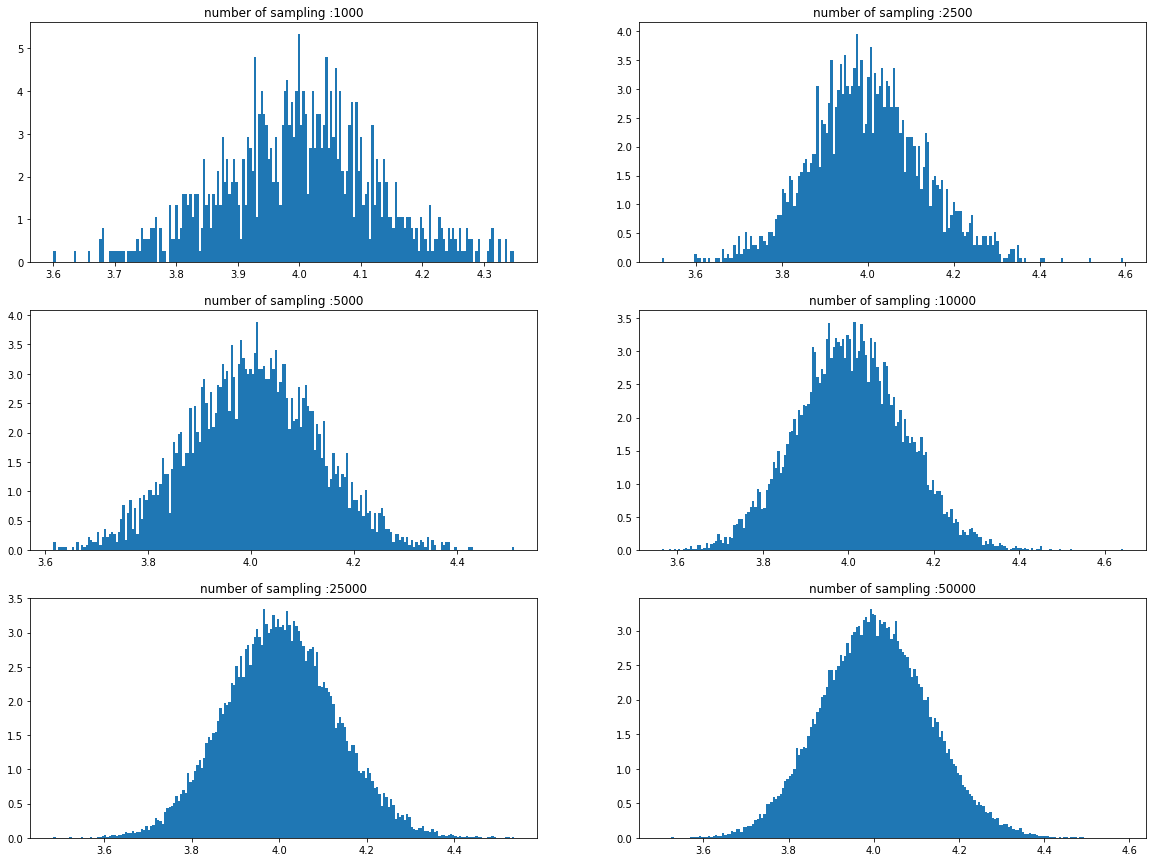

In [70]:
# sample from population with different number of sampling
# a list of sample mean
meansample = []
# number of sample
numofsample = [1000,2500,5000,10000,25000,50000]
# sample size
samplesize = 500
# for each number of sampling (1000 to 50000)
for i in numofsample:
    # collect mean of each sample
    eachmeansample = []
    # for each sampling
    for j in range(0,i):
        # sampling 500 sample from population
        rc = random.choices(s, k=samplesize)
        # collect mean of each sample
        eachmeansample.append(sum(rc)/len(rc))
    # add mean of each sampling to the list
    meansample.append(eachmeansample)
    
# plot
cols = 2
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(20,15))
n = 0
for i in range(0, rows):
    for j in range(0, cols):
        ax[i, j].hist(meansample[n], 200, density=True)
        ax[i, j].set_title(label="number of sampling :" + str(numofsample[n]))
        n += 1

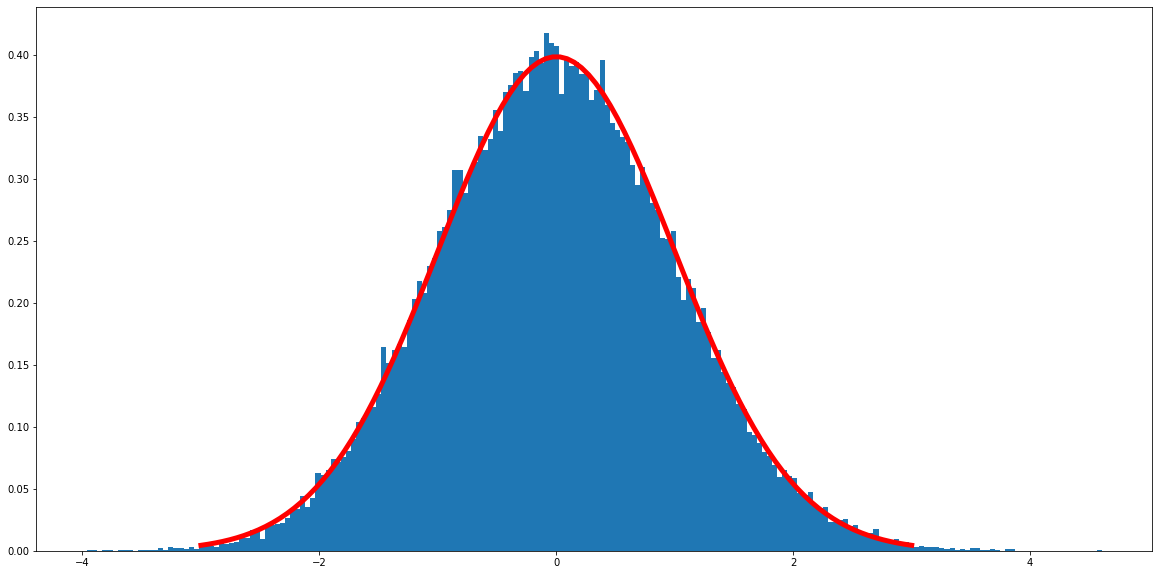

In [71]:
# use last sampling
sm = meansample[len(meansample)-1]
# calculate start deviation
std = np.std(sm)
# set population mean
mean = np.mean(sm)
# list of standarded sample
zn = []
# for each sample subtract with mean and devided by standard deviation
for i in sm:
    zn.append((i-mean)/std)
    
# plot hist
plt.figure(figsize=(20,10))
plt.hist(zn, 200, density=True)
# compare with standard normal disrtibution line
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# draw standard normal disrtibution line
plt.plot(x, stats.norm.pdf(x, mu, sigma),linewidth = 5, color='red')
plt.show()

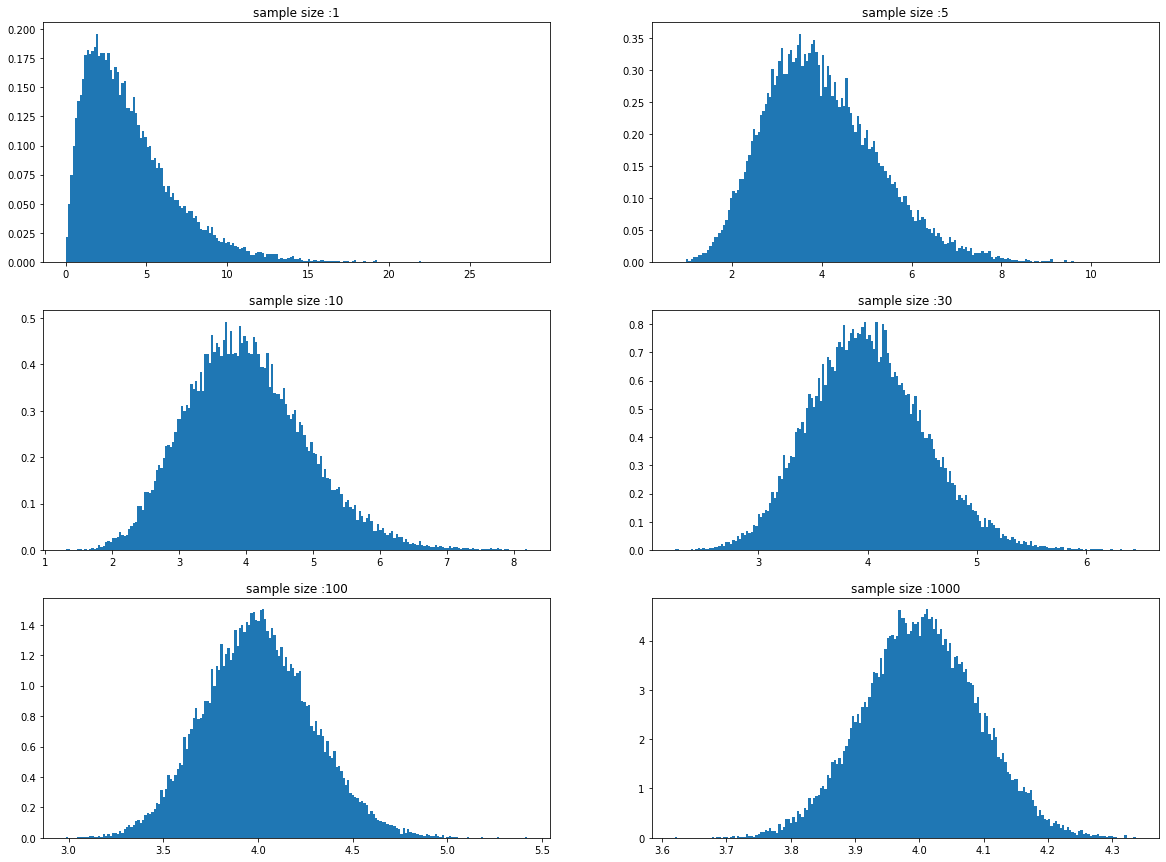

In [72]:
## sample with different sample size
# list of sample mean
meansample = []
# number of sampling
numofsample = 25000
# sample size
samplesize = [1,5,10,30,100,1000]
# for each sample size (1 to 1000)
for i in samplesize:
    # collect mean of each sample
    eachmeansample = []
    # for each sampling
    for j in range(0,numofsample):
        # sampling i sample from population
        rc = random.choices(s, k=i)
        # collect mean of each sample
        eachmeansample.append(sum(rc)/len(rc))
    # add mean of each sampling to the list
    meansample.append(eachmeansample)
    
# plot
cols = 2
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(20,15))
n = 0
for i in range(0, rows):
    for j in range(0, cols):
        ax[i, j].hist(meansample[n], 200, density=True)
        ax[i, j].set_title(label="sample size :" + str(samplesize[n]))
        n += 1

In [73]:
## expect value of sample
# use last sampling
sample = meansample[5]
# expected value of sample equal to expect value of population
print("expected value of sample:", np.mean(sample))
print("expected value of population:", shape*scale)
# standard deviation of sample equl to standard deviation of population divided by squre root of n
print("standard deviation of sample:", np.std(sample))
print("standard deviation of population:", scale*np.sqrt(shape))
print("standard deviation of population divided by squre root of sample size:", scale*np.sqrt(shape)/np.sqrt(1000))

expected value of sample: 4.002949959066495
expected value of population: 4.0
standard deviation of sample: 0.08944261507373893
standard deviation of population: 2.8284271247461903
standard deviation of population divided by squre root of sample size: 0.0894427190999916


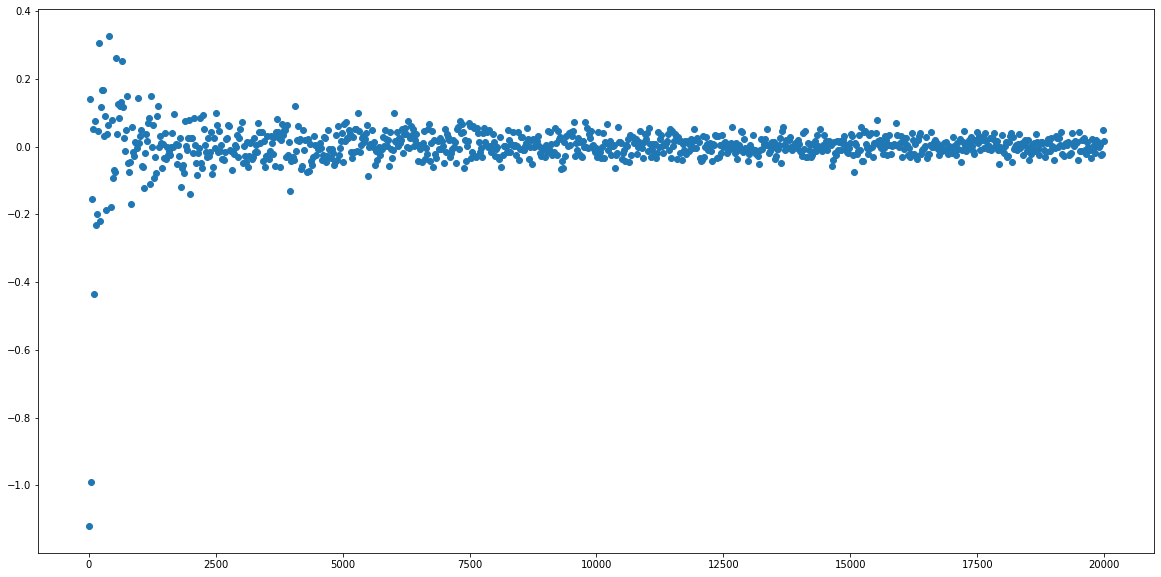

In [74]:
## show that as the sample size increases the mean of sample is close to population mean
# set expected values of population
mu = shape*scale # mean
# sample size
samplesize = []
# collect difference between sample mean and mu
diflist = []
# for each sample size
for n in range(10,20000,20): 
    # sample 10000 sample
    rs = random.choices(s, k=n)
    # start count
    c = 0
    # calculate mean
    mean = sum(rs)/len(rs)
    # collect difference between sample mean and mu
    diflist.append(mean-mu)
    samplesize.append(n)

# set figure size.
plt.figure(figsize=(20,10))
# plot each diference.
plt.scatter(samplesize,diflist, marker='o')
# show plot.
plt.show()

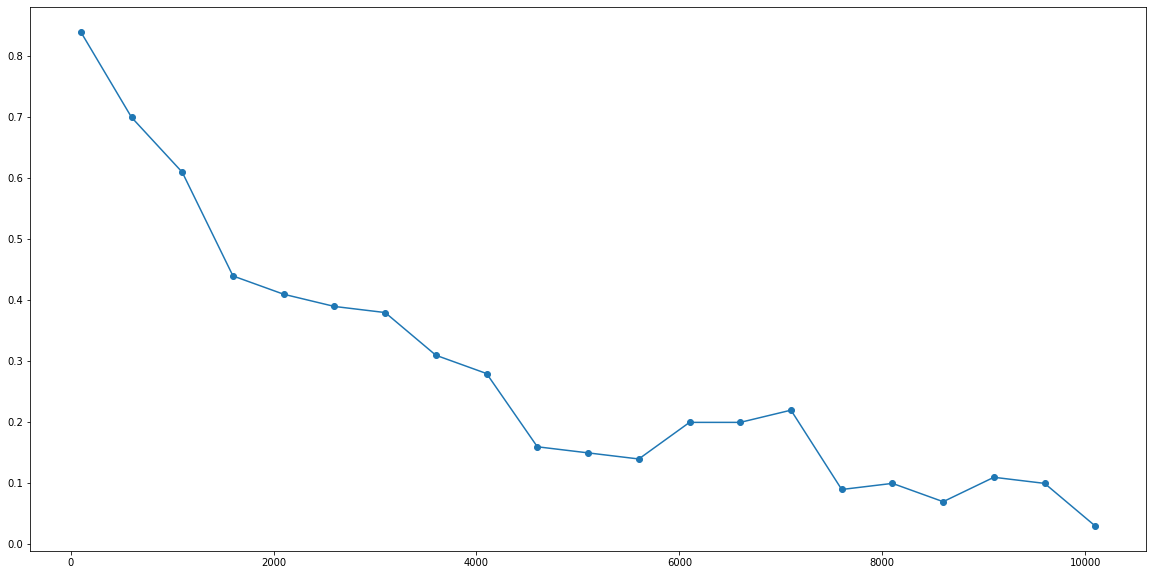

In [75]:
## show that as the sample size increases the probability that sample mean is further from population mean than error
# margin of error
epsilon = 0.05
# list of probability of each sample size
proberror = []
# sample size for plotting
samplesize = []

# for each sample size
for n in range(100,10101,500): 
    # start count
    c = 0
    for i in range(0,100):
        # sample 10000 sample
        rs = random.choices(s, k=n)
        # calculate mean
        mean = sum(rs)/len(rs)
        # check if the difference is larger than error
        if abs(mean - mu) > epsilon:
            # if larger count the sampling
            c += 1
    # calculate the probability
    proberror.append(c/100)
    # save sample size for plotting
    samplesize.append(n)

# set figure size.
plt.figure(figsize=(20,10))
# plot each probability.
plt.plot(samplesize,proberror, marker='o')
# show plot.
plt.show()

# Part3: A/B Testing

## One sample t-test: 

You have 10 ages and you are checking whether avg age is 30 or not. (check code below for that using python)

In [0]:
mylist = [32,34,29,29,22,39,38,37,38,36,30,26,22,22]
df = pandas.DataFrame(data=mylist)
df.to_csv("ages.csv", sep=',',index=False,header=None)

In [77]:
!head ages.csv

32
34
29
29
22
39
38
37
38
36


In [78]:
from scipy.stats import ttest_1samp
import numpy as np
ages = np.genfromtxt('ages.csv')
print(ages)

[32. 34. 29. 29. 22. 39. 38. 37. 38. 36. 30. 26. 22. 22.]


In [79]:
ages_mean = np.mean(ages)
print(ages_mean)
t, pval = ttest_1samp(ages, 30) # Calculate the T-test for the mean of ONE group of scores.
print("t =", t, ", p-value =", pval)

31.0
t = 0.5973799001456603 , p-value = 0.5605155888171379


In [80]:
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

we are accepting null hypothesis


## Two sample t-test: 

## Example: is there any association between week1 and week2 ( code is given below in python)

In [0]:
import numpy as np
np.random.seed(2019) #option for reproducibility
week1_list = np.random.randint(low=0, high=100, size=50).tolist()

In [0]:
np.random.seed(2020) #option for reproducibility
week2_list = np.random.randint(low=0, high=100, size=50).tolist()

In [0]:
df = pandas.DataFrame(data=week1_list)
df.to_csv("week1.csv", sep=',',index=False,header=None)
df = pandas.DataFrame(data=week2_list)
df.to_csv("week2.csv", sep=',',index=False,header=None)

In [0]:
from scipy.stats import ttest_ind
import numpy as np

In [85]:
week1 = np.genfromtxt("week1.csv",  delimiter=",")
week2 = np.genfromtxt("week2.csv",  delimiter=",")
print("week1 data :-\n")
print(week1)
print("\n")
print("week2 data :-\n")
print(week2)

week1 data :-

[72. 31. 37. 88. 62. 24. 29. 15. 12. 16. 48. 71. 83. 12. 80. 50. 95.  5.
 24. 28. 21. 48. 91. 15. 65. 54. 10. 96. 11. 82. 79. 86. 86. 51. 61. 33.
 99. 53. 80. 70. 97. 88. 58. 82. 57.  8. 55. 71.  7. 80.]


week2 data :-

[96.  8. 67. 67. 91.  3. 71. 56. 29. 48. 32. 24. 74.  9. 51. 11. 55. 62.
 67. 69. 48. 28. 20.  8. 38. 84. 65.  1. 79. 69. 74. 73. 62. 21. 29. 90.
  6. 38. 22. 63. 21. 68.  6. 98.  3. 20. 55.  1. 52.  9.]


In [86]:
import scipy.stats
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html
stats.levene(week1,week2)

LeveneResult(statistic=0.002264718310921979, pvalue=0.9621406014510561)

In [87]:
week1_mean = np.mean(week1)
week2_mean = np.mean(week2)
print("week1 mean value:",week1_mean)
print("week2 mean value:",week2_mean)

week1 mean value: 53.52
week2 mean value: 44.82


In [88]:
week1_std = np.std(week1)
week2_std = np.std(week2)
print("week1 std value:",week1_std)
print("week2 std value:",week2_std)

week1 std value: 29.525744698483052
week2 std value: 28.842808462422656


In [89]:
ttest,pval = ttest_ind(week1,week2,equal_var=True) #  two independent samples of scores.
# ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
print("p-value",pval)

p-value 0.14329810698879697


In [90]:
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

we accept null hypothesis


## Paired t-test

## H0 :- mean difference between two sample is 0
## H1:- mean difference between two sample is not 0

check the code below for same

In [0]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

In [0]:
df = pd.read_csv("https://github.com/yug95/MachineLearning/raw/master/Hypothesis%20testing/blood_pressure.csv")

In [93]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [94]:
df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


In [95]:
ttest,pval = stats.ttest_rel(df['bp_before'], df['bp_after']) # return t-statistic and p-value
print(pval)

0.0011297914644840823


In [96]:
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


# Reference:
1. https://reneshbedre.github.io/blog/anova.html
2. https://medium.com/analytics-vidhya/illustration-with-python-central-limit-theorem-aa4d81f7b570